# Subspace approach

In this notebook, we are going to simulate the $g^{(2)}(0)$ for a system of $ N = 7$  atoms using the subspace approach.



Fist go to the src folder, in my case:

In [1]:
cd /home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src

/home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src


## Imports

Some local imports are necessary

And add the file paths of the corresponding packages of the tutorial.

In [2]:
import os
import sys

sys.path.insert(0, os.path.abspath("./post_processing/local_calculations"))
sys.path.insert(0, os.path.abspath("./helper_functions/cloud"))
sys.path.insert(0, os.path.abspath("./file_manager"))
sys.path.insert(0, os.path.abspath("./hamiltonean_builder"))
sys.path.insert(0, os.path.abspath("./correlation"))
sys.path.insert(0, os.path.abspath("./single_and_double_excitations_subspace"))

We import qutip and matplotlib and all the local packages we are going to use.

In [3]:
from qutip import *
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from hamiltonean_builder import *
from helper_functions.operators import *
from helper_functions.cloud import *
from file_manager.visualization_preparation_tools import *
from correlation.second_order_correlation  import *
from single_and_double_excitations_subspace.parameter_generator_for_ODE import *
from single_and_double_excitations_subspace.atomic_contributions_ODE import *
from post_processing.local_calculations import *
from helper_functions.cloud import *

## Atomic Cloud

First, let's generate a set of random position for the atomic cloud

In [4]:
N = 7
b0 = 0.1
r = random_cloud(0, N, exc_radius = None, b0 = b0) 
#exc_radius = None, implies that it will be set do default value exc_radius = 0.3/rho**(1/3) 

We can draw the cloud for ilustrative purposes

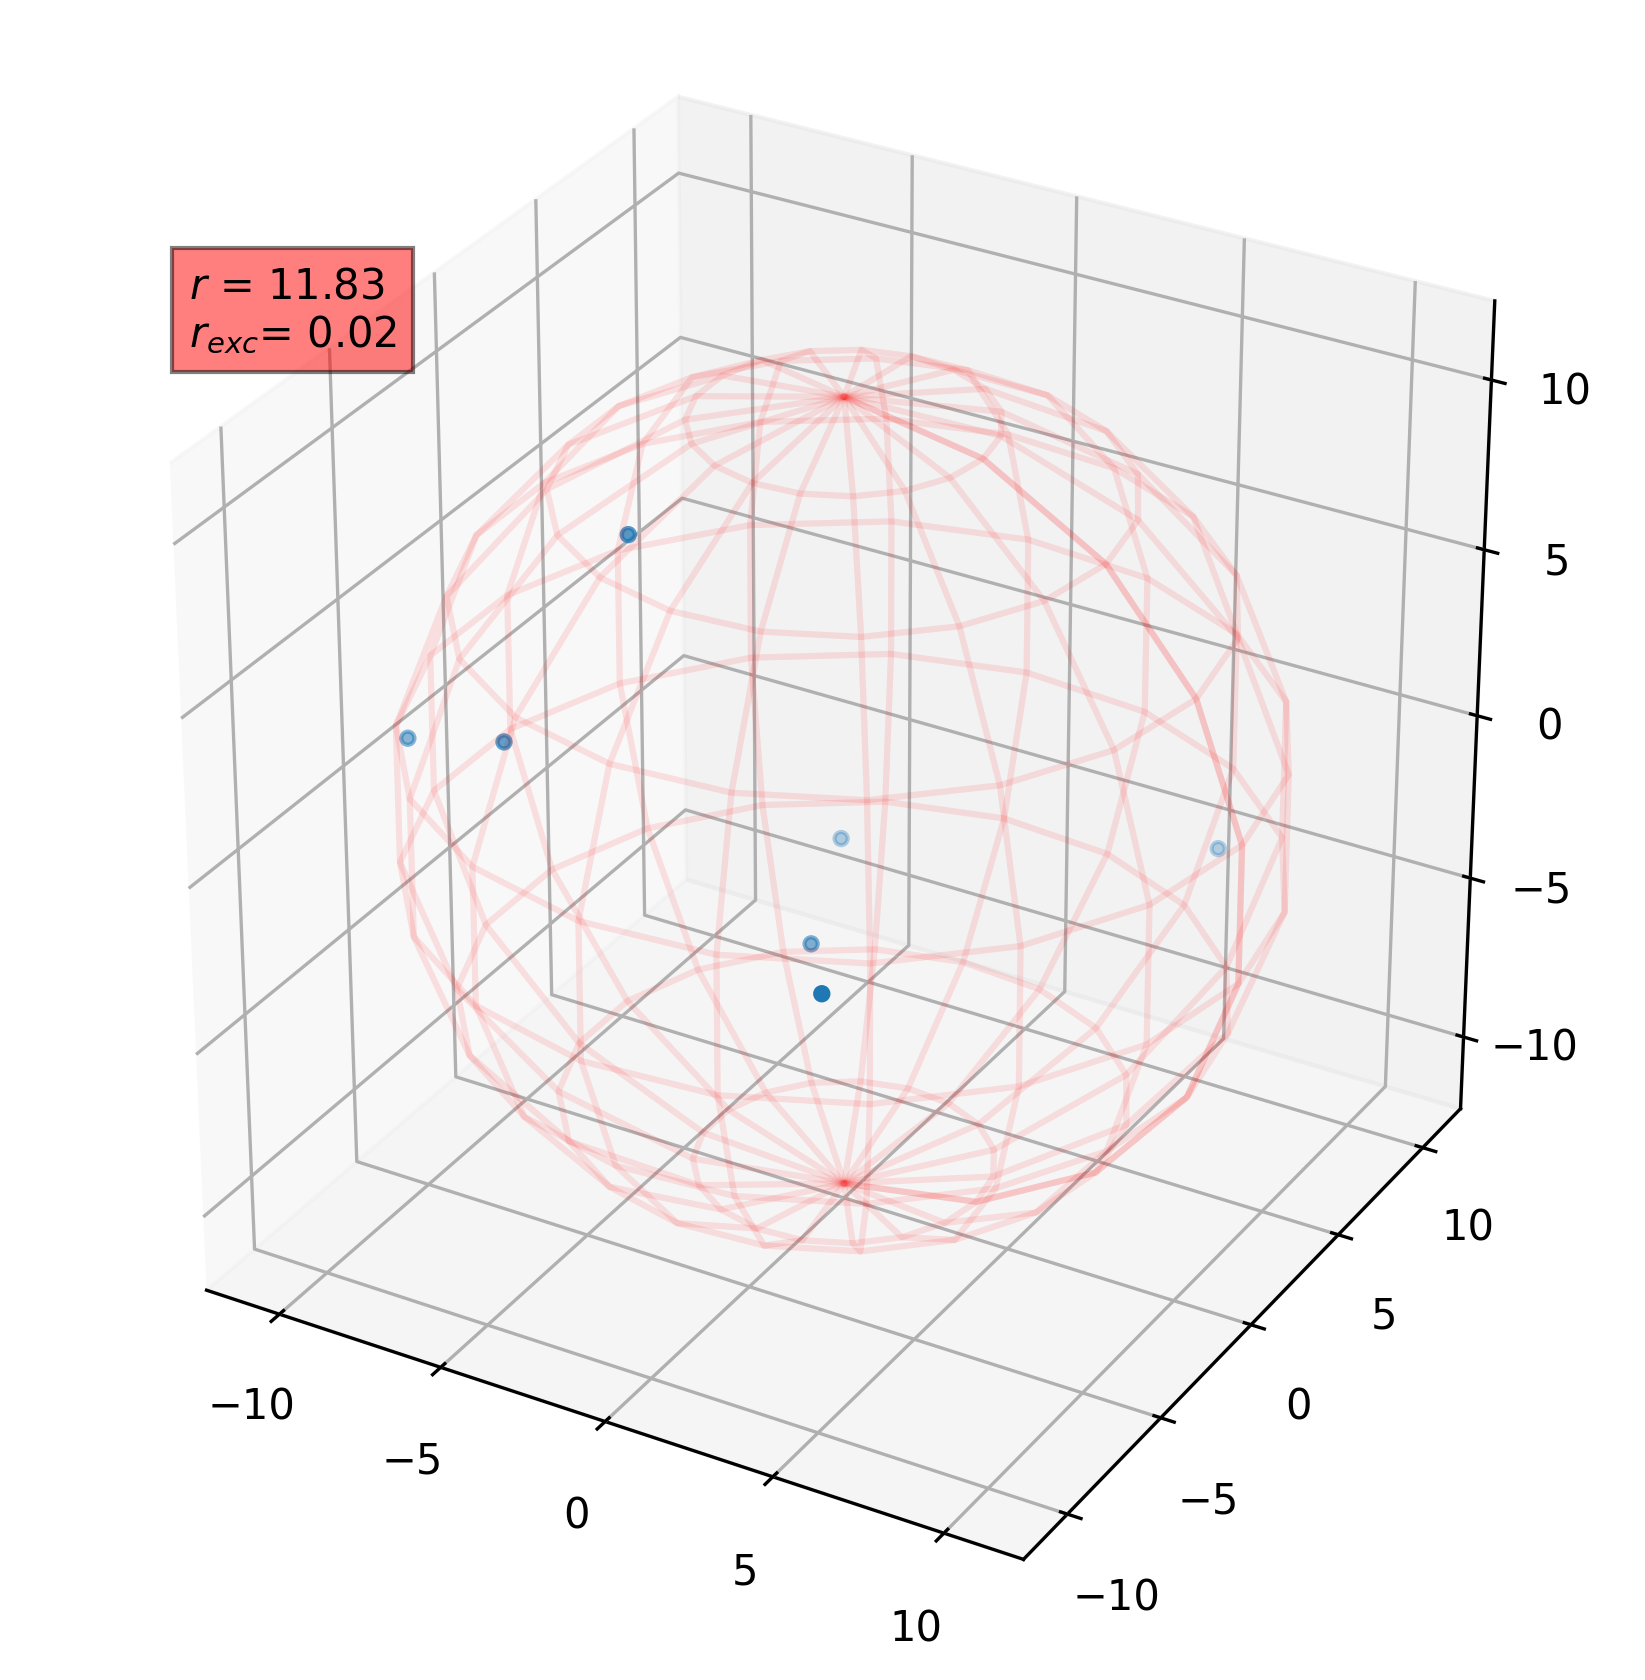

In [5]:
ax = draw_cloud(r, b0, alpha = 0.1)

#ax.figure.savefig(f"./benchmarking/cloud_b0_0.1_pos{ind}.svg", format="svg")

## Subspace approach

Now, let's consider an excitation field of $\Omega = 2$ and $\Delta = 20\Gamma $ and obtain the respectives matrices for $\Delta_i, \Omega_{i}, \Gamma_{ij}, \Delta_{ij}$ to be used in the system of differential equations.

In [12]:
Omega = 2
Delta = 20
Delta1D, Omega1D, Gamma2D, Delta2D  = GetAllODEParametersGiven_r(Omega, Delta, r, scalar = True)

Now, we can simply solve to obtain $\beta_i$ and $\beta_{ij}$

In [15]:
#time array
tf = 20
t_span, dt = np.linspace(0,tf,200, retstep = True)


Beta1D_time_list, Beta2D_time_list, t_span, r = SolveForBeta1DandBeta2D(N_atoms, kd = None, b0 = None, exc_radius = None, Delta = Delta, Omega = Omega, wave_mixing = True, scalar = True, interaction = True, r = r, t_span = t_span  );

Plotting the result for the single excitation case $\beta_j = \langle \sigma_j \rangle $

Text(0, 0.5, '$\\beta_{i} = \\langle \\sigma^-_i \\rangle $')

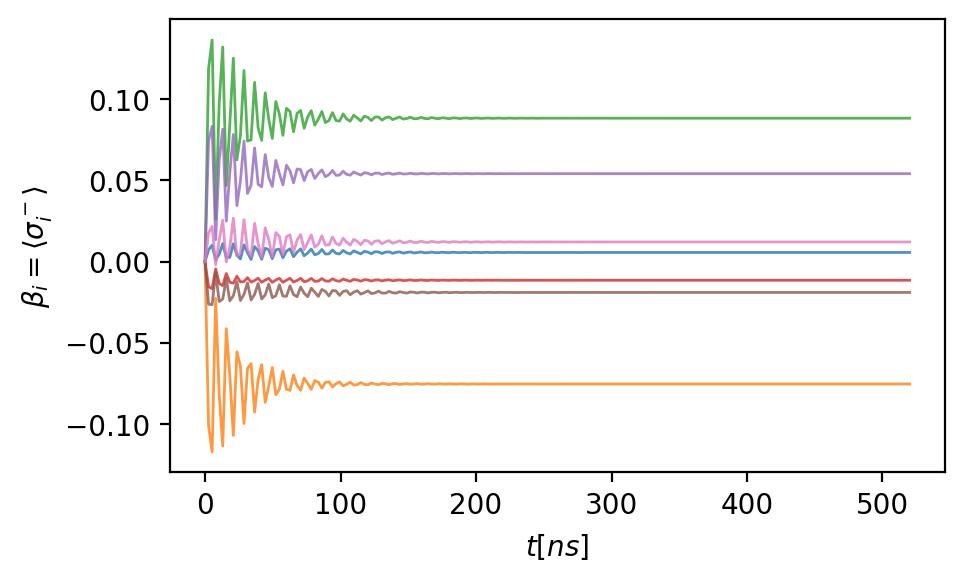

In [21]:
fig = plt.figure(figsize=(5, 3), dpi=200)
for i in range(len(r)):
    beta_plot = plt.plot(t_span*26, np.real(column(Beta1D_time_list, i)), linewidth = 1, alpha = 0.8)

plt.xlabel("$t [ns] $", fontsize = 10)
plt.ylabel(r"$\beta_{i} = \langle \sigma^-_i \rangle $", fontsize = 10)

## Second Correlation Function

Now, we can simulate $g^{(2)}(0)$ changing the direction of the second detector for the first sensor pointing at $\theta = 25^o$

In [22]:
ang1 = 25
R1 = get_nhat_from_angle(ang1) #Vector pointing at 25 degrees
ang2 = np.linspace(0, 360, 200) #


R2_list = [] 
g2_zero_approximated = []


for theta in ang2:
        R2 = get_nhat_from_angle(theta)
        R2_list.append(get_nhat_from_angle(theta))
        
        g2_i = np.real(g2_of_zero_subspace_approach(r, R1, R2, Beta1D_time_list[-1], Beta2D_time_list[-1]))
        g2_zero_approximated.append(g2_i)

Plotting

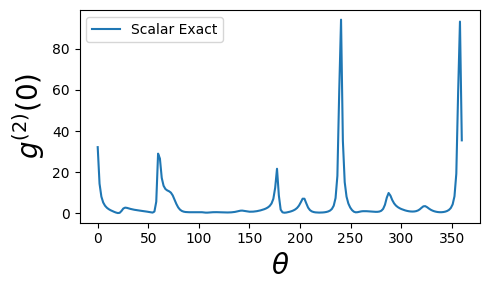

In [39]:
#uncomment for polar plot

#fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
#plt.plot(ang2*360/(2*3.14), g2_zero_approximated,label = "Scalar Exact")

fig = plt.figure(figsize=(5, 3), dpi=100)
plt.plot(ang2, g2_zero_approximated,label = "Scalar Exact")


plt.xlabel(r"$\theta$", size = 20)
plt.ylabel(r"$g^{(2)}(0)$", size = 20)
#plt.scatter([25],[2], marker =  "*", label = "Recife (Same direction)")
#plt.scatter([220],[1], marker =  "*", label = "Recife (Opposite direction)")
plt.legend()
fig.tight_layout()
#plt.savefig(f"./benchmarking/g2zero_TCC_N{N}_b0_{b0}_Omega{Omega}Delta{Delta}_pos{ind}.svg", format = "svg")
